# MNIST Deep Learning Tutorial

This notebook demonstrates a complete workflow for training a CNN on the MNIST dataset using our modular project structure.

**We will cover**:
1. Importing modules and setting the environment
2. Loading MNIST data
3. Building and training the CNN model
4. Evaluating the model and visualizing predictions

Let's get started!

In [ ]:
#loading scripts
from src import data_loader, model, train, evaluate, utils
import matplotlib.pyplot as plt


#loading configuration to set seed
config = data_loader.load_config()
seed_value = config['training'].get('seed', 42)
utils.set_seed(seed_value)

# load the data
(x_train, y_train), (x_test, y_test) = data_loader.load_mnist_data(config)

#print the shape
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Seed set to 42
Training set shape: (60000, 28, 28, 1) (60000, 10)
Test set shape: (10000, 28, 28, 1) (10000, 10)


## Visualizing Some Sample Images

Let's visualize a few samples from the training set to understand the data better.

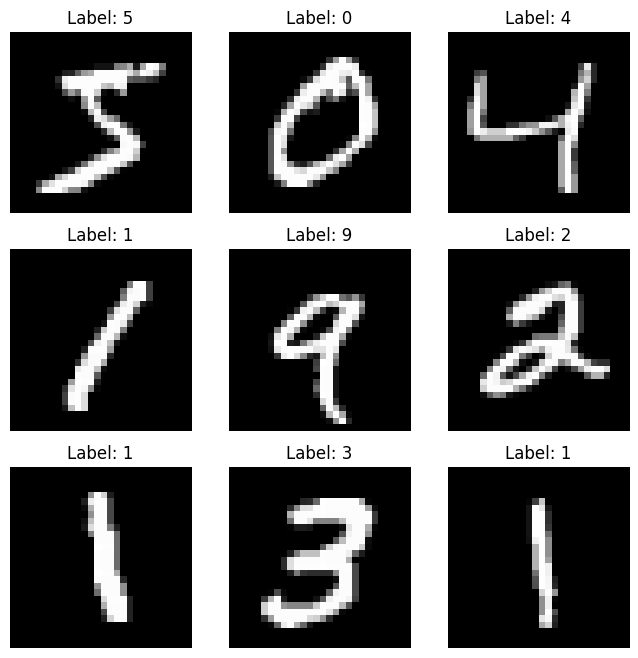

In [ ]:
import numpy as np

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

## Building the CNN Model

Next, we will create a simple Convolutional Neural Network using our modular design. The model is defined in `src/model.py` and can be easily inspected and modified.

In [ ]:
#creating cnn model with desired input size and output classes(10 for MNIST)
cnn_model = model.create_cnn_model(input_shape=(28, 28, 1), num_classes=10, config=config)
cnn_model.summary()

/Users/hp/Desktop/CodeDemo/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,874 (862.79 KB)

 Trainable params: 220,554 (861.54 KB)

 Non-trainable params: 320 (1.25 KB)

## Training the Model with MLflow

We now train the model. The training script in `src/train.py` uses MLflow to automatically log parameters and metrics. This makes tracking experiments and reproducibility much easier.

In [4]:
# Train the model (this will also log the experiment with MLflow)
history = train.train()
print('Training complete!')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8609 - loss: 0.4903

938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8610 - loss: 0.4900 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 2/5
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9689 - loss: 0.1077

938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9689 - loss: 0.1077 - val_accuracy: 0.9869 - val_loss: 0.0397
Epoch 3/5
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9764 - loss: 0.0808

938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9764 - loss: 0.0808 - val_accuracy: 0.9880 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9786 - loss: 0.0715

938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9786 - loss: 0.0715 - val_accuracy: 0.9888 - val_loss: 0.0354
Epoch 5/5
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9814 - loss: 0.0586

938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9814 - loss: 0.0586 - val_accuracy: 0.9917 - val_loss: 0.0272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Training complete!


## Evaluating the Model

After training, we will evaluate the model using our evaluation script in `src/evaluate.py`. This cell will load the saved model and display performance metrics with some sample predictions.

In [ ]:
#import importlib
import src.evaluate as evaluate
#importlib.reload(evaluate)
evaluate.evaluate()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0324
Test Loss: 0.027161434292793274
Test Accuracy: 0.9916999936103821


## Next Steps and Integration

This notebook demonstrates a complete workflow from data loading, model building, training, and evaluation using best practices for modularity and reproducibility. 

### Task for students (choose any):

- **Containerization:** Use the provided `Dockerfile` to containerize this project for deployment.
- **CI/CD:** Integrate the CI pipeline using the `.github/workflows/ci.yml` file to automate testing and deployment.
- **Experiment Tracking:** Explore MLflow's UI to compare different runs and hyperparameters.
- **Enhancements:** Modify the model architecture, experiment with different data preprocessing techniques, or add additional modules as needed.

